## 1. Setup environment

### 1.1 Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

### 1.2 Fix random seeds for reproducibility

In [2]:
np.random.seed(7)
torch.manual_seed(7);

## 2. Data 

In [3]:
x_values = np.array([i for i in range(11)])
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 + 2*(np.random.random()-0.5) for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

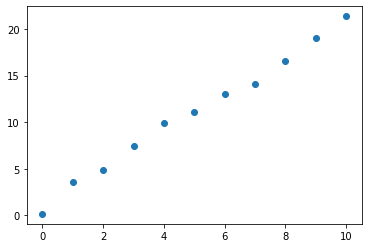

In [4]:
plt.scatter(x_train, y_train);

## 3. Linear regression model setup

### 3.1 Define model structure/architecture

In [5]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

### 3.2 Define model hyperparameters

In [6]:
inputDim = 1
outputDim = 1 
learningRate = 0.01
epochs = 10

### 3.3 Initialize model instance

In [7]:
model = linearRegression(inputDim, outputDim)

## 4. Training - linear regression in action

### 4.1 Define loss function and optimisation schedule for training

In [8]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### 4.2 Run model training routine

In [9]:
for epoch in range(epochs):
    inputs = torch.from_numpy(x_train)
    labels = torch.from_numpy(y_train)

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)

    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()
    
    if epoch%1 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 164.13247680664062
epoch 1, loss 14.125893592834473
epoch 2, loss 1.8851006031036377
epoch 3, loss 0.8814905285835266
epoch 4, loss 0.7945186495780945
epoch 5, loss 0.7823713421821594
epoch 6, loss 0.776383638381958
epoch 7, loss 0.7709541916847229
epoch 8, loss 0.7656255960464478
epoch 9, loss 0.7603600025177002


### 4.3 Visualise trained model predictions

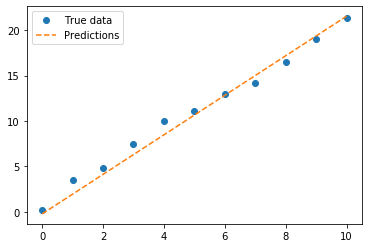

In [10]:
with torch.no_grad(): # we don't need gradients in the testing phase
        predicted = model(torch.from_numpy(x_train)).data.numpy()

plt.clf()
plt.plot(x_train, y_train, 'o', label='True data')
plt.plot(x_train, predicted, '--', label='Predictions')
plt.legend(loc='best')
plt.show()